#**iv. Ciclotrón** #

El ciclotrón es un dispositivo que acelera partículas cargadas a altas velocidades. Las partículas con alta energía producidas se usan para bombardear nucleos atómicos y por tanto producir reacciones nucleares. Los hospitales usan este tipo de dispositivo para producir substancias radioactivas para diagnosticar y tratar enfermedades.

Las partículas cargadas, inicialmente en reposo en el origen, son aceleradas mediante la acción de un campo eléctrico en la región comprendida entre dos regiones en forma de D. En estas regiones hay un campo magnético perpendicular que les produce un movimiento circular, cuyo radio depende de la velocidad de la partícula. El campo eléctrico debe variar de manera periódica con el fin de que en cada paso por la región entre las Ds se produzca una ganancia de velocidad.

![ciclotron](https://drive.google.com/uc?id=10mKMerIOM7c9etI51ZIxuLgZW3dCJVBu)


El campo magnético se ajusta de modo que el tiempo que se necesita para recorrer la trayectoria semicircular dentro del electrodo sea igual al semiperiodo T/2 de las oscilaciones. En consecuencia, cuando los iones vuelven a la región intermedia, el campo eléctrico habrá invertido su dirección y los iones recibirán entonces un segundo aumento de la velocidad al pasar al interior de la otra 'D'. 

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.mlab as mlab
from scipy.integrate import odeint
from scipy import signal
%matplotlib inline
#import matplotlib.animation as animation
#from matplotlib.pylab import *
from mpl_toolkits.axes_grid1 import host_subplot
from scipy.signal import find_peaks
import random
##############################
######### Version 2022 #######
###########################################
DNI=12345678 # introduce tu DNI sin letra
############################################

random.seed(DNI)
# Diferencia de potencial entre las dos placas, o Des.
dV=random.randrange(400,600,1)*10 # V

print('Voltaje entre las Des: dV= {:} V'.format(dV))

Voltaje entre las Des: dV= 5840 V


In [ ]:
############## Partículas a estudiar    ###############################
# Definimos un diccionario con todas las particulas a calcular con su valor de masa y carga
# particula = {nombre : [masa (Kg), carga(C)]}

iones={'1p+': [1.67E-27, 1.6E-19],'1e-': [9.11E-31, -1.6E-19],'1e+': [9.11E-31, 1.6E-19],
       '1H+': [1.67E-27, 1.6E-19], '2H+': [3.32E-27, 1.6E-19],'3H+': [4.98E-27, 1.6E-19], '4H+': [6.688E-22, 1.6E-19], '4He++': [6.688E-27, 3.2E-19],
       '16O+': [26.56E-27, 1.6E-19], '17O+': [28.22E-27, 1.6E-19], '18O+': [29.88E-27, 1.6E-19],
       '32S+': [53.12E-27, 1.6E-19], '33S+': [54.78E-27, 1.6E-19], '34S+': [56.44E-27, 1.6E-19],
       '35Cl+': [58.10E-27, 1.6E-19], '36Cl+': [59.76E-27, 1.6E-19], '37Cl+': [61.42E-27, 1.6E-19]}
ni = len(iones)


In [ ]:
def ciclotron(z,t,par):
    
    x,vx,y,vy=z
    #v=(vx**2+vy**2)**0.5
    #g=1/(1-(v/c)**2)**0.5

    yy=np.abs(y)

    if yy < 0.5*h :
      cB=0
      cE=1
    else:
      cB=1
      cE=0
    
    # ecuación coordenada radial
    r=np.sqrt((yy-0.5*h)**2+x**2)
   
    if r > Rc:
        cE=0
        cB=0
    
    #frecuencia del generador del campo E
    coswt=math.cos(omega*t) # Cosenoidal 
    s=math.copysign(1,vy) # Signo
    cuad=signal.square(omega*t) # Cuadrada
    
    dzdt=[vx,qm*vy*cB*B,vy,qm*cE*E*coswt-qm*vx*cB*B]
    #dzdt=[vx,qm*vy*cB*B,vy,qm*cE*E*s-qm*vx*cB*B]
    #dzdt=[vx,qm*vy*cB*B,vy,qm*cE*E*cuad-qm*vx*cB*B]
    #dzdt=[vx,qm*vy*cB*B/g,vy,(qm*cE*E*cuad-qm*vx*cB*B)/g]
    return dzdt


Variando el valor del campo magnético *B* y el radio *R* del ciclotrón se consigue confinar la partícula y lograr que dé vueltas aumentando su velocidad.

Frecuencia angular w= 1.91617E+07 rad/s
Tiempo en recorrer el condensador tI= 3.781E-08 s
Aceleración a la salida del condensador a= 2.798E+13 m/s
Velocidad a la salida del condensador v= 1.058E+06 m/s
Radio R= 5.521E-02 m
Semiperiodo T/2= 1.640E-07 s
Frecuencia f= 6.099E+06 s
Energía que gana en cada paso AEc= 9.344E-16 J


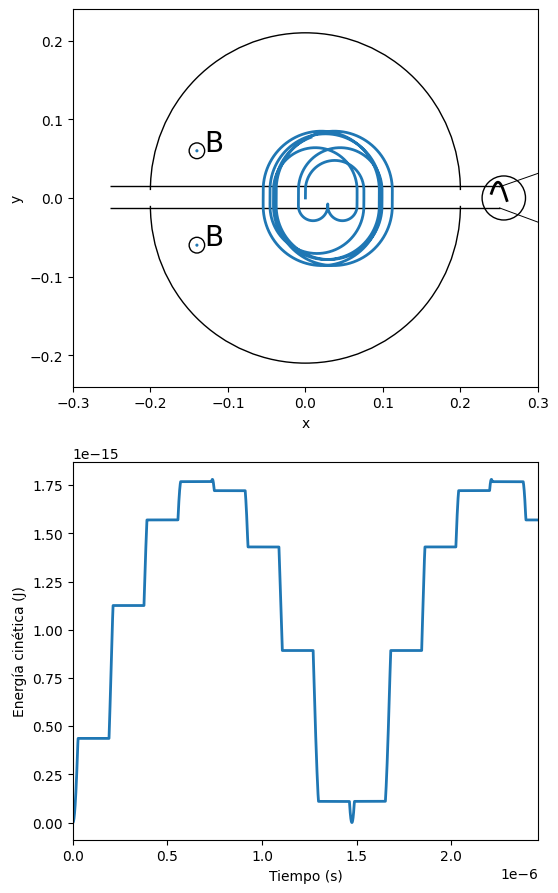

In [ ]:
# Este programa calcula la trayectoria de un determinado ion en un ciclotron
# Y grafica como va cambiando la energia cinetica del ion con el tiempo


ion='1H+'
m=iones[ion][0] # Masa del ion (Kg) 
q=iones[ion][1] # Carga del ion (C)


#Datos de entrada del programa
# h debe ser pequeño para que el tiempo que el ion pasa entre las Ds sea 
# despreciable frente al tiempo que el ion recorre en las Ds

qm=q/m      # Relacion carga masa
B=0.2   # Campo magnético existente en las Ds (T)
#dV=5141  # Diferencia de potencial alterna existente entre las Ds
h=0.02     # Separacion entre las Ds (m)
Rc=0.2     #Radio de las Ds del ciclotron (m)

E=dV/h     #Campo electrico existente entre las Ds del ciclotron
omega=1.0*qm*B #frecuencia angular a la que oscila el voltaje entre las Ds 
# si omega=qm*B la frec. del ciclotron y la señal estaran en fase
# con el movimiento del ion
print('Frecuencia angular w= {:.5E} rad/s'.format(omega))

tI = h*np.sqrt(2/dV/qm)
print('Tiempo en recorrer el condensador tI= {:.3E} s'.format(tI))
a=q*dV/m/h
print('Aceleración a la salida del condensador a= {:.3E} m/s'.format(a))
v=np.sqrt(2*h*a)
print('Velocidad a la salida del condensador v= {:.3E} m/s'.format(v))

# Radio de giro. 
R = np.sqrt(2*dV*m/(q*B**2))
print('Radio R= {:.3E} m'.format(R))

# Tiempo en recorrer la semicircunferencia D.
tD=np.pi/qm/B
print('Semiperiodo T/2= {:.3E} s'.format(tD))
print('Frecuencia f= {:.3E} s'.format(1/tD))
#AEc=Ep=dV*q  AEc=q*V*(1/2+n)
AE=dV*q
print('Energía que gana en cada paso AEc= {:.3E} J'.format(AE))
#Ec=(q**2*Bf**2*R**2)/m/2
#print('Energía Ec= {:.3E} J'.format(Ec))

#tf=3   # tiempo final de simulacion
#tf=9*(2*tD)
tf=15*tD
par=[qm,E,B,h,Rc,omega]

# Definicion de las ecuaciones de movimiento del ion
# El voltaje entre las Ds es una señal cuadrada con frecuencia
# angular omega y valor E, aunque existe la opcion de poner
# una señal sinusoidal

# Llamada a odeint que resuelve ec. Movimiento del ion
nt=100000
z0=[0.0,0.0,0.0,0.0]    
t=np.linspace(0,tf,nt)
abserr = 1.0e-8
relerr = 1.0e-6

z=odeint(ciclotron,z0,t,args=(par,),atol=abserr, rtol=relerr)

#fig=plt.figure()
#fig, axarr=plt.subplots(1,2)
#fig.set_dpi(100)
#fig.set_size_inches(7,6.5)

# Definicion de las graficas
# Modificar los limites de los ejes a gusto, así como los titulos
#f0 = figure(num = 0, figsize = (5, 10))#, dpi = 100)
f0 = plt.figure()
f0.set_dpi(100)
f0.set_size_inches(6,11)
#f0.suptitle("Ciclotrón", fontsize=12)
ax01 = plt.subplot2grid((2, 2), (0, 0),colspan=2)
ax02 = plt.subplot2grid((2, 2), (1, 0),colspan=2)

# Limites de la grafica del ciclotron
ax01.set_xlim(-1.5*Rc,1.5*Rc)
ax01.set_ylim(-1.2*Rc,1.2*Rc)

# Limites de la grafica de la Ec(t)
# Modificarlo para ver la grafica
ax02.set_xlim(0,tf)

ax02.set_xlabel("Tiempo (s)")
ax02.set_ylabel("Energía cinética (J)")

# La primera linea corresponde a la trayectoria del ion en el ciclotron
# la segunda linea corresponde a la grafica de la energía cinetica en funcion del tiempo
# Modificar esta segunda linea si se quiere graficar otra variable o se pone la Ec en 
# otras unidades 
line, = ax01.plot(z[:,0],z[:,2], linewidth=2)

Ecn=m*(z[:,1]**2+z[:,3]**2)/2
line2, = ax02.plot(t,Ecn,linewidth=2)

ax02.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax02.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))

# Crea los diferentes circulos, arcos, lineas y textos del dibujo
circle1=patches.Circle((-0.7*Rc,0.3*Rc),0.05*Rc,fill=False)
circle2=patches.Circle((-0.7*Rc,0.3*Rc),0.01*Rc)
circle3=patches.Circle((-0.7*Rc,-0.3*Rc),0.05*Rc,fill=False)
circle4=patches.Circle((-0.7*Rc,-0.3*Rc),0.01*Rc)


pac1 = patches.Arc([0,0.5*h], 2*Rc, 2*Rc, angle=0, theta1=0, theta2=180)
pac2 = patches.Arc([0,-0.5*h], 2*Rc, 2*Rc, angle=180, theta1=0, theta2=180)
line1=patches.Arrow(-Rc,0.5*h,2.15*Rc,0.,width=0)
line2=patches.Arrow(-Rc,-0.5*h,2.15*Rc,0.,width=0)
circle5=patches.Circle((1.28*Rc,0),0.14*Rc,fill=False)
line3=patches.Arrow(1.17*Rc,0.03*Rc,0.05*Rc,0,width=0)
line4=patches.Arrow(1.22*Rc,0.03*Rc,0,-0.08*Rc,width=0)
line5=patches.Arrow(1.22*Rc,-0.05*Rc,0.05*Rc,0,width=0)
line6=patches.Arrow(1.27*Rc,-0.05*Rc,0,0.08*Rc,width=0)
line7=patches.Arrow(1.27*Rc,0.03*Rc,0.05*Rc,0,width=0)
line8=patches.Arrow(1.32*Rc,0.03*Rc,0,-0.08*Rc,width=0)
line9=patches.Arrow(1.32*Rc,-0.05*Rc,0.05*Rc,0,width=0)
line10=patches.Arrow(1.37*Rc,-0.05*Rc,0,0.08*Rc,width=0)
         

# Add the patch to the Axes
ax01.add_patch(circle1)
ax01.add_patch(circle2)
ax01.add_patch(circle3)
ax01.add_patch(circle4)
ax01.add_patch(circle5)

ax01.text(-0.65*Rc,0.3*Rc, "B",fontsize=20)
ax01.text(-0.65*Rc,-0.3*Rc, "B",fontsize=20)

ax01.add_patch(pac1)
ax01.add_patch(pac2)
ax01.add_patch(line1)
ax01.add_patch(line2)
ax01.add_patch(line3)
ax01.add_patch(line4)
ax01.add_patch(line5)
ax01.add_patch(line6)
ax01.add_patch(line7)
ax01.add_patch(line8)
ax01.add_patch(line9)
ax01.add_patch(line10)

rect1 = patches.Rectangle((-0.252,-0.0125),0.503,0,linewidth=1,edgecolor='black',facecolor='none')
rect2 = patches.Rectangle((-0.252,0.0146),0.503,0,linewidth=1,edgecolor='black',facecolor='none')

rect3 = patches.Rectangle((0.25,-0.0125),0.06,0,angle=-20,linewidth=0.7,edgecolor='black',facecolor='none')
rect4 = patches.Rectangle((0.25,0.014),0.06,0,angle=19,linewidth=0.7,edgecolor='black',facecolor='none')
ax01.add_patch(rect1)
ax01.add_patch(rect2)
ax01.add_patch(rect3)
ax01.add_patch(rect4)

#xt = np.linspace(0.298,0.345,100)
xt = np.linspace(Rc*1.2,Rc*1.3,100)
yt = 0.02*np.sin(xt*150+2)
ax01.plot(xt, yt, 'black',linewidth= 2)

#plt.figure()   #Anade un nuevo grafico y lo activa
#plot(t[0:nt],z[0:nt,0], "r")
ax01.set_xlabel("x")
ax01.set_ylabel("y")
#ax02.set_title("Grafico")

plt.show()
